# Analyzing Portfolio Risk and Return

In [102]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np

%matplotlib inline



### Import the Data


In [103]:
# Load .env enviroment variables
load_dotenv()

True

In [104]:
alpaca_api_key = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_SECRET_KEY")

In [105]:
# Set current amount of shares
#Tech
my_appl = 50
my_amzn = 50
my_nflx = 50
my_spy = 50
my_goog = 50
my_fab = 50

# ETFs
my_voo = 50
my_vgt = 50

In [106]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [107]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-09-07", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["FB", "APPL","AMZN","NFLX","GOOG","SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for the tickers
# YOUR CODE HERE!
df_tech_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
FB = df_tech_stock_data[df_tech_stock_data['symbol']=='FB'].drop('symbol', axis=1)
APPL = df_tech_stock_data[df_tech_stock_data['symbol']=='APPL'].drop('symbol', axis=1)
SPY = df_tech_stock_data[df_tech_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AMZN = df_tech_stock_data[df_tech_stock_data['symbol']=='AMZN'].drop('symbol', axis=1)
NFLX = df_tech_stock_data[df_tech_stock_data['symbol']=='NFLX'].drop('symbol', axis=1)
GOOG = df_tech_stock_data[df_tech_stock_data['symbol']=='GOOG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_tech_stock_data = pd.concat([GOOG,APPL,SPY,AMZN,NFLX,FB],axis=1, keys=['GOOG','APPL','SPY','AMZN','NFLX','FB'])

# Preview DataFrame
df_tech_stock_data.head()
df_tech_stock_data.tail()

GOOG                                      \
                              open     high      low   close    volume   
timestamp                                                                
2022-08-31 04:00:00+00:00  111.630  111.770  109.050  109.15  25884888   
2022-09-01 04:00:00+00:00  109.200  111.220  108.190  110.55  22783719   
2022-09-02 04:00:00+00:00  111.340  111.675  108.130  108.68  20681559   
2022-09-06 04:00:00+00:00  108.135  108.880  106.510  107.48  20557394   
2022-09-07 04:00:00+00:00  107.760  110.990  107.615  110.48  23168179   

                                                  APPL           ...     NFLX  \
                          trade_count        vwap open high low  ...   volume   
timestamp                                                        ...            
2022-08-31 04:00:00+00:00      225813  110.003290  NaN  NaN NaN  ...  8615748   
2022-09-01 04:00:00+00:00      278560  109.577315  NaN  NaN NaN  ...  7292904   
2022-09-02 04:00:00+00:00      229808  109.749947  NaN  NaN NaN  ...  8163451   
2022-09-06 04:00:00+00:00      246791  107.564535  NaN  NaN NaN  ...  7465692   
2022-09-07 04:00:00+00:00      248533  109.595898  NaN  NaN NaN  ...  8147848   

                                                    FB                        \
                          trade_count        vwap open high low close volume   
timestamp                                                                      
2022-08-31 04:00:00+00:00      126819  227.669035  NaN  NaN NaN   NaN    NaN   
2022-09-01 04:00:00+00:00      123511  224.822034  NaN  NaN NaN   NaN    NaN   
2022-09-02 04:00:00+00:00      128928  229.017513  NaN  NaN NaN   NaN    NaN   
2022-09-06 04:00:00+00:00      129774  218.485956  NaN  NaN NaN   NaN    NaN   
2022-09-07 04:00:00+00:00      115048  224.690090  NaN  NaN NaN   NaN    NaN   

                                            
                          trade_count vwap  
timestamp                                   
2022-08-31 04:00:00+00:00         NaN  NaN  
2022-09-01 04:00:00+00:00         NaN  NaN  
2022-09-02 04:00:00+00:00         NaN  NaN  
2022-09-06 04:00:00+00:00         NaN  NaN  
2022-09-07 04:00:00+00:00         NaN  NaN  

[5 rows x 42 columns]

## ETFs
```
Vanguard S&P 500 ETF (VOO)
Vanguard Information Technology ETF (VGT)
```

In [108]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-08-07", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["VOO", "VGT"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for VOO and VGT
df_etf = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
VOO = df_etf[df_etf['symbol']=='VOO'].drop('symbol', axis=1)
VGT = df_etf[df_etf['symbol']=='VGT'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_etf = pd.concat([VOO,VGT],axis=1, keys=['VOO','VGT'])

# Preview DataFrame
df_etf.head()
df_etf.tail()

VOO                                    \
                             open     high     low   close   volume   
timestamp                                                             
2022-08-01 04:00:00+00:00  376.12  380.010  375.44  377.65  4374908   
2022-08-02 04:00:00+00:00  376.11  379.627  373.95  375.21  4054107   
2022-08-03 04:00:00+00:00  377.19  382.100  376.91  381.07  3826838   
2022-08-04 04:00:00+00:00  380.88  381.530  379.19  380.77  3274628   
2022-08-05 04:00:00+00:00  376.60  380.700  376.54  379.98  2843831   

                                                      VGT                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2022-08-01 04:00:00+00:00       88166  377.840171  367.20  373.30  365.640   
2022-08-02 04:00:00+00:00       93254  376.597738  366.11  371.93  364.530   
2022-08-03 04:00:00+00:00       83236  380.034817  369.53  379.07  369.530   
2022-08-04 04:00:00+00:00       74004  380.565442  377.74  379.53  374.941   
2022-08-05 04:00:00+00:00       82991  378.877859  373.35  380.12  373.060   

                                                                   
                            close  volume trade_count        vwap  
timestamp                                                          
2022-08-01 04:00:00+00:00  369.54  572617       23880  370.083886  
2022-08-02 04:00:00+00:00  367.63  547046       26805  368.244635  
2022-08-03 04:00:00+00:00  378.29  482865       14945  376.632144  
2022-08-04 04:00:00+00:00  379.49  324378       11706  377.862618  
2022-08-05 04:00:00+00:00  378.90  338058       14358  377.190347

### Analyze the Performance

#### Clean And Organize The Data

#### Tech Stocks

In [109]:
# extract close price from tech stock data 
tech_close_price = pd.DataFrame()
for i in [ticker[0] for ticker in df_tech_stock_data]:
    tech_close_price[i] = df_tech_stock_data[i]['close']
print(tech_close_price)
tech_close_price

                              GOOG  APPL     SPY     AMZN    NFLX      FB
timestamp                                                                
2020-08-07 04:00:00+00:00  1494.49   NaN  334.57  3167.46  494.73  268.44
2020-08-10 04:00:00+00:00  1496.10   NaN  335.56  3148.16  483.38  263.00
2020-08-11 04:00:00+00:00  1480.32   NaN  332.82  3080.67  466.93  256.13
2020-08-12 04:00:00+00:00  1506.62   NaN  337.31  3162.24  475.47  259.89
2020-08-13 04:00:00+00:00  1518.45   NaN  336.81  3161.02  481.33  261.30
...                            ...   ...     ...      ...     ...     ...
2022-08-31 04:00:00+00:00   109.15   NaN  395.18   126.77  223.56     NaN
2022-09-01 04:00:00+00:00   110.55   NaN  396.42   127.82  230.04     NaN
2022-09-02 04:00:00+00:00   108.68   NaN  392.24   127.51  226.11     NaN
2022-09-06 04:00:00+00:00   107.48   NaN  390.76   126.11  218.39     NaN
2022-09-07 04:00:00+00:00   110.48   NaN  397.78   129.48  228.96     NaN

[525 rows x 6 columns]


,GOOG,APPL,SPY,AMZN,NFLX,FB
timestamp,,,,,,
2020-08-07 04:00:00+00:00,1494.49,NaN,334.57,3167.46,494.73,268.44
2020-08-10 04:00:00+00:00,1496.10,NaN,335.56,3148.16,483.38,263.00
2020-08-11 04:00:00+00:00,1480.32,NaN,332.82,3080.67,466.93,256.13
2020-08-12 04:00:00+00:00,1506.62,NaN,337.31,3162.24,475.47,259.89
2020-08-13 04:00:00+00:00,1518.45,NaN,336.81,3161.02,481.33,261.30
...,...,...,...,...,...,...
2022-08-31 04:00:00+00:00,109.15,NaN,395.18,126.77,223.56,NaN
2022-09-01 04:00:00+00:00,110.55,NaN,396.42,127.82,230.04,NaN
2022-09-02 04:00:00+00:00,108.68,NaN,392.24,127.51,226.11,NaN


In [110]:
# Drop the APPL column 
new_tech_close = tech_close_price.drop(columns = "APPL")
new_tech_close.dropna()

,GOOG,SPY,AMZN,NFLX,FB
timestamp,,,,,
2020-08-07 04:00:00+00:00,1494.49,334.57,3167.46,494.73,268.44
2020-08-10 04:00:00+00:00,1496.10,335.56,3148.16,483.38,263.00
2020-08-11 04:00:00+00:00,1480.32,332.82,3080.67,466.93,256.13
2020-08-12 04:00:00+00:00,1506.62,337.31,3162.24,475.47,259.89
2020-08-13 04:00:00+00:00,1518.45,336.81,3161.02,481.33,261.30
...,...,...,...,...,...
2022-06-02 04:00:00+00:00,2354.92,417.34,2510.22,205.09,198.86
2022-06-03 04:00:00+00:00,2290.92,410.54,2447.00,198.98,190.78
2022-06-06 04:00:00+00:00,2340.21,411.79,124.79,197.14,194.25


#### ETFs

In [111]:
# loop through the etf close price 
df_etf_close = pd.DataFrame()
for i in [ticker[0] for ticker in df_etf]:
    df_etf_close[i] = df_etf[i]['close']
df_etf_close

,VOO,VGT
timestamp,,
2020-08-07 04:00:00+00:00,307.36,303.19
2020-08-10 04:00:00+00:00,308.34,302.23
2020-08-11 04:00:00+00:00,305.77,296.88
2020-08-12 04:00:00+00:00,309.96,303.39
2020-08-13 04:00:00+00:00,309.51,304.13
...,...,...
2022-08-01 04:00:00+00:00,377.65,369.54
2022-08-02 04:00:00+00:00,375.21,367.63
2022-08-03 04:00:00+00:00,381.07,378.29


In [112]:
# clean the etf close_price data
new_etf_close = df_etf_close.dropna()
new_etf_close

,VOO,VGT
timestamp,,
2020-08-07 04:00:00+00:00,307.36,303.19
2020-08-10 04:00:00+00:00,308.34,302.23
2020-08-11 04:00:00+00:00,305.77,296.88
2020-08-12 04:00:00+00:00,309.96,303.39
2020-08-13 04:00:00+00:00,309.51,304.13
...,...,...
2022-08-01 04:00:00+00:00,377.65,369.54
2022-08-02 04:00:00+00:00,375.21,367.63
2022-08-03 04:00:00+00:00,381.07,378.29


##### Daily & Cumulative Returns

###### TECH


In [113]:
# convert the dataframe of NAVs and prices to daily returns
tech_daily_returns = new_tech_close.pct_change().dropna()
tech_daily_returns.head()

,GOOG,SPY,AMZN,NFLX,FB
timestamp,,,,,
2020-08-10 04:00:00+00:00,0.001077,0.002959,-0.006093,-0.022942,-0.020265
2020-08-11 04:00:00+00:00,-0.010547,-0.008165,-0.021438,-0.034031,-0.026122
2020-08-12 04:00:00+00:00,0.017766,0.013491,0.026478,0.018290,0.014680
2020-08-13 04:00:00+00:00,0.007852,-0.001482,-0.000386,0.012325,0.005425
2020-08-14 04:00:00+00:00,-0.007060,0.000119,-0.004113,0.002805,-0.000230


In [114]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
# YOUR CODE HERE
tech_daily_returns.hvplot(kind='line', title = "Daily Returns")

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

In [115]:
# cumulative returns of the tech portfolios and the S&P 500
tech_cumulative_returns = (1 + tech_daily_returns).cumprod()
tech_cumulative_returns.hvplot(kind = "line", title="4 fund portfolios and the S&P 500 Cumulative Returns")
tech_cumulative_returns.head()

,GOOG,SPY,AMZN,NFLX,FB
timestamp,,,,,
2020-08-10 04:00:00+00:00,1.001077,1.002959,0.993907,0.977058,0.979735
2020-08-11 04:00:00+00:00,0.990519,0.994769,0.972599,0.943808,0.954142
2020-08-12 04:00:00+00:00,1.008116,1.008190,0.998352,0.961070,0.968149
2020-08-13 04:00:00+00:00,1.016032,1.006695,0.997967,0.972915,0.973402
2020-08-14 04:00:00+00:00,1.008859,1.006815,0.993863,0.975643,0.973178


###### ETFs

In [116]:
etf_daily_returns = new_etf_close.pct_change().dropna()
etf_daily_returns.head()

,VOO,VGT
timestamp,,
2020-08-10 04:00:00+00:00,0.003188,-0.003166
2020-08-11 04:00:00+00:00,-0.008335,-0.017702
2020-08-12 04:00:00+00:00,0.013703,0.021928
2020-08-13 04:00:00+00:00,-0.001452,0.002439
2020-08-14 04:00:00+00:00,-0.000032,-0.002466


In [117]:
etf_daily_returns.hvplot(kind='line', title="ETFs Daily Returns")

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

In [118]:
etf_cumulative_returns = (1+ etf_daily_returns).cumprod()
etf_cumulative_returns.hvplot(kind='line', title="etf potfolios cumulative returns")

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

#### Analyze Volatility 

In [119]:
tech_daily_returns.hvplot(kind='box', title = "Tech Stocks Volatility")

:BoxWhisker   [Variable]   (value)

In [120]:
drop_sp = tech_daily_returns.drop(columns=["SPY"]).copy()
tech_volatility = drop_sp.hvplot(kind='box', title='Volatility of The Four  stock Portfolios')

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

#### Analyze Risk

In [121]:
tech_standards_deviation = tech_daily_returns.std()
tech_standards_deviation.sort_values()

SPY     0.011364
FB      0.025604
NFLX    0.032476
GOOG    0.045703
AMZN    0.047524
dtype: float64

In [122]:
# the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
tech_annualized_standards_deviation = tech_standards_deviation * np.sqrt(252)
tech_annualized_standards_deviation.sort_values()

SPY     0.180398
FB      0.406445
NFLX    0.515535
GOOG    0.725515
AMZN    0.754423
dtype: float64

In [123]:
etf_standards_deviation = etf_daily_returns.std()
etf_standards_deviation.sort_values()

VOO    0.011244
VGT    0.016423
dtype: float64

In [124]:
# the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
etf_annualized_standards_deviation = etf_standards_deviation * np.sqrt(252)
etf_annualized_standards_deviation.sort_values()

VOO    0.178495
VGT    0.260703
dtype: float64

In [125]:
#the rolling standard deviation of the 4 portfolios and the S&P 500 plot

tech_daily_returns.rolling(window=21).std().hvplot(kind="line",title="21-Day Rolling std of Tech Stock Portfolios and S&P 500")

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

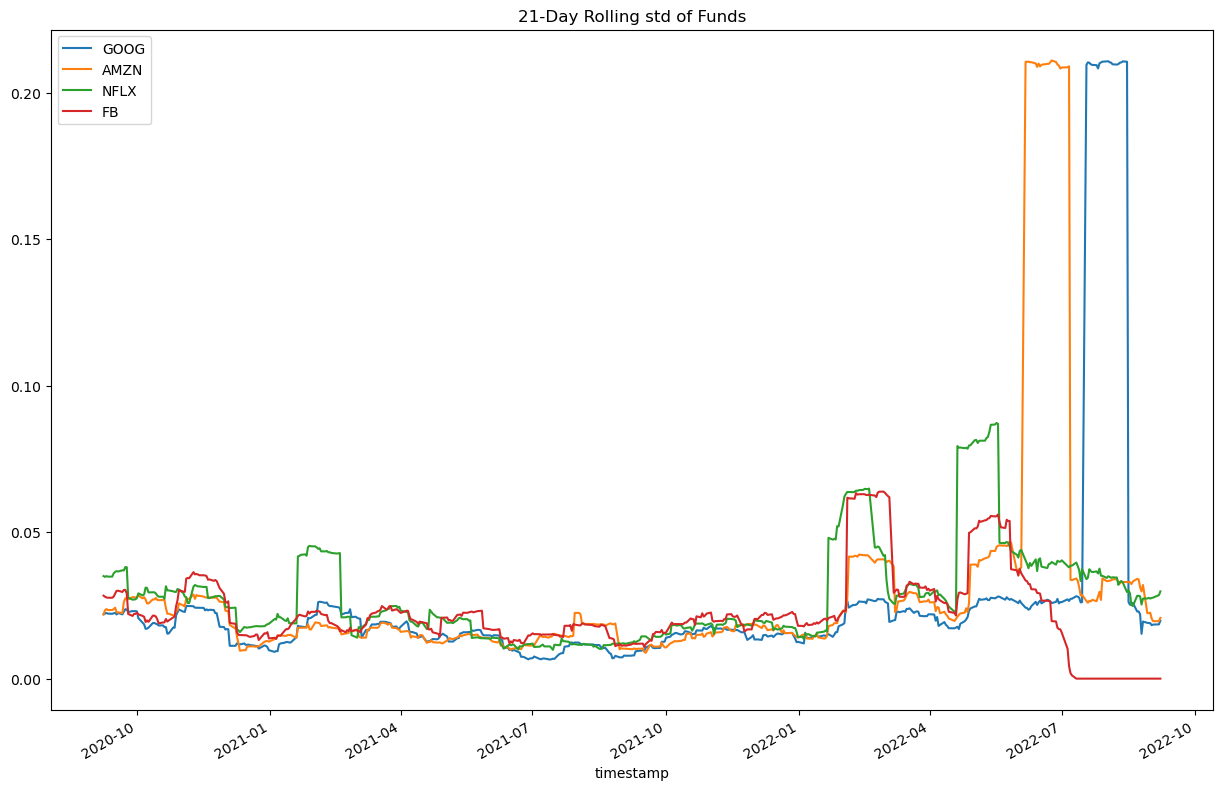

In [127]:
tech_risk = drop_sp.rolling(window=21).std().plot(figsize=(15,10), title="21-Day Rolling Tech Stock Portfolios")


Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?